# ASI assessment

# Q1: download the data and tests

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import inv
import pylab

In [3]:
#download the datasets

white_wine= pd.read_csv('winequality-white.csv', sep= ';')
red_wine = pd.read_csv('winequality-red.csv', sep= ';')

In [3]:
#tests to understand the data structure
print(white_wine.head(2))
print(white_wine.tail(2))

#give the range of index
print(white_wine.index)
#give the names of the different columns
print(white_wine.columns)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

   

In [144]:
#Maximum and minimum Quality for white_wine
print("MAX for White wine=")
maxQuality_W = white_wine['quality'].max()
print(maxQuality_W)

print("MIN for White wine=")
minQuality_W = white_wine['quality'].min()
print(minQuality_W)

MAX for White wine=
9
MIN for White wine=
3


In [145]:
#Maximum and minimum Quality for red_wine
print("MAX for Red wine=")
maxQuality_R = red_wine['quality'].max()
print(maxQuality_R)

print("MIN for Red wine=")
minQuality_R = red_wine['quality'].min()
print(minQuality_R)

MAX for Red wine=
8
MIN for Red wine=
3


# Q2: bar-plots

# White Wine

Bar plot of the number of examples with each target value for White wine dataset

4     163
8     175
5    1457
9       5
6    2198
3      20
7     880
dtype: int64


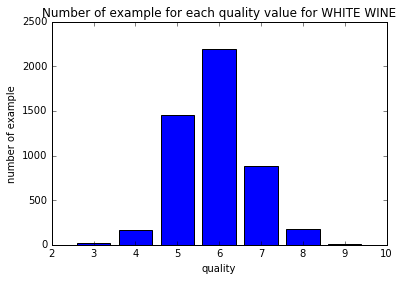

In [4]:
#count the number of elements for each target value ("quality"), 
#type of the return Value_Counts: series
Value_Counts= pd.value_counts(white_wine['quality'].values, sort= False)
print(Value_Counts)                              

#extract the keys of Value_Counts
Keys= Value_Counts.keys()
l= len(Keys)

#create lists for values and keys of the serie Value_Counts
Values=[]
Key_list=[]

for key in Keys:
    Values.append(Value_Counts[key])
for key in Keys:
    Key_list.append(key)
    
#create the bar-plot

x_pos= Key_list
y_pos= Values
plt.bar(x_pos, y_pos, align='center')
plt.xlabel('quality')
plt.ylabel('number of example')
plt.title('Number of example for each quality value for WHITE WINE')


Here is another way to plot the number of elements for each quality grades, directly from a serie type, without using intermediqte lists:

4     163
8     175
5    1457
9       5
6    2198
3      20
7     880
Name: quality, dtype: int64


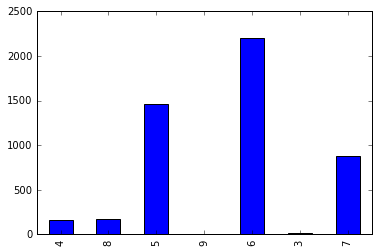

In [146]:
Value_Counts= pd.value_counts(white_wine['quality'], sort= False)
print(Value_Counts)

Value_Counts[4]
lenght= len(Value_Counts)
Value_Counts.plot.bar()

# Red Wine

Bar plot of the number of examples with each target value for Red wine dataset

3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


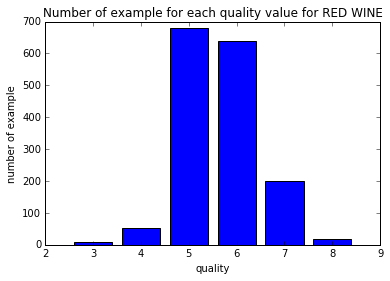

In [6]:
#count the number of elements for each target value ("quality"), 
#type of the return Value_Counts: series
Value_Counts_R= pd.value_counts(red_wine['quality'].values, sort= False)
print(Value_Counts_R)                              

#extract the keys of Value_Counts_R
Keys_R= Value_Counts_R.keys()
l_R= len(Keys_R)

#create lists for values and keys of the serie Value_Counts_R
Values_R=[]
Key_list_R=[]

for key in Keys_R:
    Values_R.append(Value_Counts_R[key])
for key in Keys_R:
    Key_list_R.append(key)
#print(Key_list)
#print(Values)

#create the bar-plot

x_pos_R= Key_list_R
y_pos_R= Values_R
plt.bar(x_pos_R, y_pos_R, align='center')
plt.xlabel('quality')
plt.ylabel('number of example')
plt.title('Number of example for each quality value for RED WINE')

# Q3) Comments on the distributions

We can see that the quality of most of the wines is between 4 and 7 for the red wine, and between 4 and 8 for the white wine. But we don't have extreme positions: we only have few wines for of quality 3, 4 and 8, and none for quality 1, 2, 9 and 10. That's means that we don't have enought data for high quality wine and low quality wine for training . 
We will easily classify wine of quality 5 and 6, but our model won't be very precise for good and bad wines. 

# Q4.a) Linear regression: split the data

In [5]:
#split the RED WINE data into training and test sets (70% for training, 30% for testing)

training_set= red_wine.sample(frac=0.7)
test_set= red_wine.drop(training_set.index)


# Q4.b) fit a linear regression to the training data

In [6]:
##prepare the dataset:

#convert the dataframe "training_set" and "test_set" into numpy arrays.
Training_Array = training_set.as_matrix()
Test_Array= test_set.as_matrix()

#split the Training_Array in 2 arrays: the first 11 columns of features, and the last column of target. 
#the return of hsplits is a list of the 2 arrays
Training_Array_splits = np.hsplit(Training_Array, [11])
#this define the names of the 2 resulting arrays:
Training_Array_features = Training_Array_splits[0]
Training_Array_target = Training_Array_splits[1]

#dimensions of Training_Array_features and _target
#print(Training_Array_features.shape[0])
#print(Training_Array_target.shape)

#We do the same to split the Test set in feature and target arrays
Test_Array_splits = np.hsplit(Test_Array, [11])
Test_Array_features = Test_Array_splits[0]
Test_Array_target = Test_Array_splits[1]

#add a column of 1 to the dataset
col_of_ones = np.ones((Training_Array_features.shape[0], 1))
col_of_ones_test = np.ones((Test_Array_features.shape[0], 1))

Training_Array_features_1= np.hstack((col_of_ones,Training_Array_features))
Test_Array_features_1= np.hstack((col_of_ones_test,Test_Array_features))

#convert datasets to matrix
Training_Matrix_features = np.mat(Training_Array_features_1)
Training_Matrix_target = np.mat(Training_Array_target)
Test_Matrix_features = np.mat(Test_Array_features_1)
Test_Matrix_target = np.mat(Test_Array_target)

#transposed the training matrix
Transposed_Training_Matrix_features = Training_Matrix_features.transpose()
#Xt.X
Product= np.dot(Transposed_Training_Matrix_features, Training_Matrix_features)
#(Xt.X)^-1
Inverse_of_Product= inv(Product)
#(Xt.X)^-1.Xt
Product2= np.dot(Inverse_of_Product, Transposed_Training_Matrix_features)

#Compute the Weights:
weights= np.dot(Product2, Training_Matrix_target)

#Compute the predicted target: Weights x test_set
Predicted_target= np.matrix.dot(Test_Matrix_features, weights)


#compute the error between the true targets and the predicted target
#values are not round
error= Test_Matrix_target-Predicted_target

#compute the Mean Squarred Error:
transposed_error= error.transpose()
error_pas_normalise= np.dot(transposed_error, error)
lenght_test= len(Test_Matrix_features)
mse= error_pas_normalise/lenght_test


print('THE MEAN SQUARRED ERROR IS  : ')
print(mse)

THE MEAN SQUARRED ERROR IS  : 
[[ 0.43412395]]


In [20]:
#roud the predicted values
arounded_array= np.around(Predicted_target_as_array)
#compute the error between the true targets and the predicted target
#values are not round
error= Test_Matrix_target-arounded_array

#compute the Mean Squarred Error:
transposed_error= error.transpose()
error_pas_normalise= np.dot(transposed_error, error)
lenght_test= len(Test_Matrix_features)
mse= error_pas_normalise/lenght_test


print('THE MEAN SQUARRED ERROR WITH ROUNDED TARGETS IS  : ')
print(mse)

THE MEAN SQUARRED ERROR WITH ROUNDED TARGETS IS  : 
[[ 0.51666667]]


The MSE is higher with rounded values for the predicted targets. 

# 4d) Scatter plot: predictions vs true targets

<b>Plot of the difference between the predicted quality and the true quality of the test set</b>

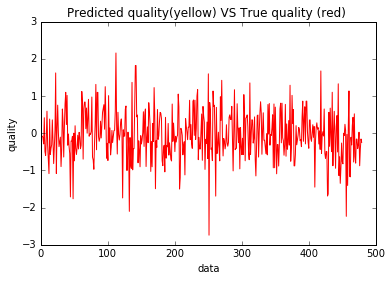

In [7]:
plt.plot(range(lenght_test), Test_Matrix_target-Predicted_target , c='red')
#plt.plot(range(lenght_test), Predicted_target, c= 'yellow')
plt.xlabel('data')
plt.ylabel('quality')
plt.title('Predicted quality(yellow) VS True quality (red) ')

Predicted_target_as_array= np.asarray(Predicted_target)



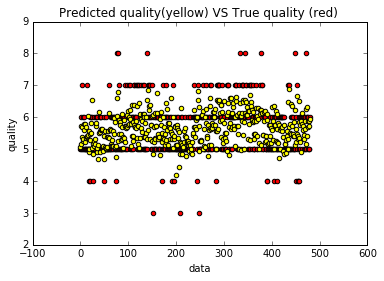

In [154]:
plt.scatter(range(lenght_test), Test_Array_target,c='red' )
plt.scatter(range(lenght_test), Predicted_target_as_array,c='yellow' )
plt.xlabel('data')
plt.ylabel('quality')
plt.title('Predicted quality(yellow) VS True quality (red) ')

we can see that we have to "round" the predicted target to obtain a better view of what is happening, moreover, the targets values have to been integer between 0 and 10.

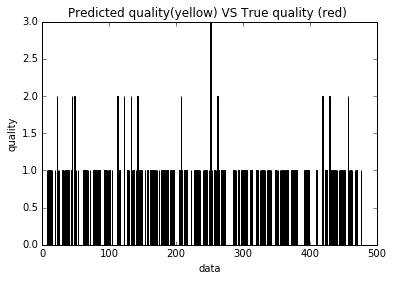

In [19]:
#plot the diffenrence between the round predicted values and the target values
plt.bar(range(lenght_test), abs(Test_Array_target-arounded_array))
plt.xlabel('data')
plt.ylabel('quality')
plt.title('Predicted quality(yellow) VS True quality (red) ')

This plot show that mainly, the error on the wine quality is of only 1 degree of quality. But those errors are numerous. Moreover, the MSE with rounded values is about 51%, meaning that 50% of the time, the model make an error of 1 degree of quality or 2, over 6 possible values (between 3 and 8).  Wich can be actually considered as a good model. 

# Q4.d) Suggest a benchmark 

we could used a treshold, that the MSE has to fit , if the calculated MSE is under this threshold, the model is good, if not, the model is not.

In [22]:
#transform the MSE into a float
mse_array=np.asarray(mse)
value = float(mse_array[0][0])

To decide if the MSE value is good I chose to compare it with the error value obtain by doing the difference between the mean of all the target of the test set, and the targets themselves. 

In [24]:
#implement the threshold computation: we take the mean of every target

sum_test_target= np.sum(Test_Matrix_target)
mean_Test_matrix_target=sum_test_target/(len(Test_Matrix_target))
#print("mean de test matrix target :" + str(mean_Test_matrix_target))

error_mean= abs(Test_Matrix_target - mean_Test_matrix_target)

sum_error_mean= np.sum(error_mean)
#print("error:" + str(sum_error_mean))

threshold_mse_0= sum_error_mean/len(error_mean)
print("the threshold is : " + str(threshold_mse_0))

the threshold is : 0.688567708333


We obtain a certain threshold (around 0,6), and we compare it to the MSE value. 

In [26]:
#### implement a threshold to check if the MSE is good
if value < threshold_mse_0:
    print('the model is good')
else:
    print('the model is NOT good')

the model is good


The threshold obtain is about 0,7 wich is significantly higher than the MSE obtain with the linear regression, we can say that our model is good, and it's worth to implement it. 

# Q5) Regularized linear regression

In [32]:
#uses the products computed for the previous linear regression
identity_matrix=np.identity(Product.shape[0])

lambda_param = 1
mse_list=[]

for lambda_param in np.arange(0,5, 0.01):
    
    intermediate_sum= (Product + lambda_param*identity_matrix )
    Inverse_of_intermediate_sum= inv(intermediate_sum)
    Product_3= np.dot(Inverse_of_intermediate_sum, Transposed_Training_Matrix_features)
    weights_regularized= np.dot(Product_3, Training_Matrix_target)
    
    Predicted_target_regularized= np.matrix.dot(Test_Matrix_features, weights_regularized)
    
    error_reg= Test_Matrix_target-Predicted_target_regularized
    transposed_error_reg= error_reg.transpose()
    error_pas_normalise_reg= np.dot(transposed_error_reg, error_reg)
    lenght_test= len(Test_Matrix_features)
    
    mse_regularized= error_pas_normalise_reg/lenght_test
    
    mse_list.append(mse_regularized)

print("length of MSE_LIST : " + str(len(mse_list)))

length of MSE_LIST : 500


In [33]:
#create a list with all the value of mse for each lambda value

mse_list_value2= []
for i in range(len(mse_list)):
    mse_list_reg=np.asarray(mse_list[i])
    value2 = float(mse_list_reg[0][0])
    mse_list_value2.append(value2)
    

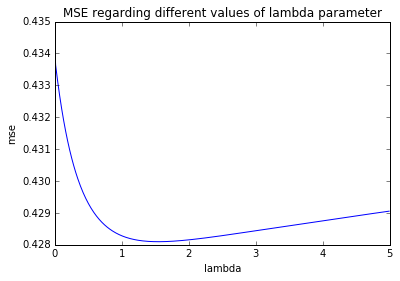

In [35]:
plt.plot(np.arange(0, 5, 0.01), mse_list_value2)
plt.xlabel('lambda')
plt.ylabel('mse')
plt.title('MSE regarding different values of lambda parameter')

it' s not a good way to determine the value of lambda: indeed hta minimum seems to be for the value 0, so for a simple linear regression. 

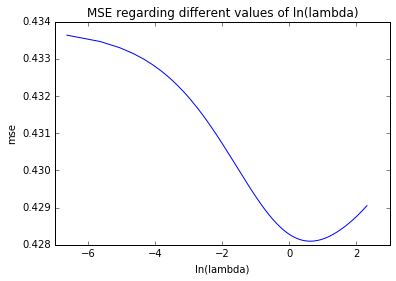

In [36]:
#plot of MSE and ln(lambda)
plt.plot(np.log2(np.arange(0, 5, 0.01)), mse_list_value2)
plt.xlabel('ln(lambda)')
plt.ylabel('mse')
plt.title('MSE regarding different values of ln(lambda)')

In [49]:
#give the value of lambda parameter for the minimum MSE
lambda_index=sorted(enumerate(mse_list_value2), key=lambda x: x[1])[0]
lambda_value=[np.arange(0, 5, 0.01)]
lambda_for_min_MSE= lambda_value[0][lambda_index[0]]
print("lambda parameter for MINIMUM MSE is : " + str(lambda_for_min_MSE))

lambda parameter for MINIMUM MSE is : 1.54


This is not a good way to determine the value of lambda, indeed: we are using the test set to find the optimal value of lambda while the test set should only be use to test our model, not determine it. 

<b><u> Cross Validation to determine the value of the regularization parameter</u></b>

In [51]:
#add column of 1 to Red_Wine
col_of_ones_wine = np.ones((red_wine.shape[0], 1))
new_red_wine= np.hstack((col_of_ones_wine,red_wine))
print(new_red_wine.shape)

(1599L, 13L)


In [53]:
#create a list 10 folds of random indices
n= len(red_wine)
K=n/10
indices=[]
rest=red_wine
for i in range(10):
    fold_i=[]
    fold_i=rest.sample(K)
    rest=rest.drop(fold_i.index)
    indices.append(fold_i.index)
    
list_of_list=[]
for m in range(10):
    list_indice=[]
    for j in range(len(indices[m])):
        list_indice.append(indices[m][j])
    list_of_list.append(list_indice)



In [56]:
#convert the dataset to a matrix
red_wine_matrix= red_wine.as_matrix()

In [60]:
fold_0= [new_red_wine[i,:] for i in list_of_list[0]]
fold_1= [new_red_wine[i,:] for i in list_of_list[1]]
fold_2= [new_red_wine[i,:] for i in list_of_list[2]]
fold_3= [new_red_wine[i,:] for i in list_of_list[3]]
fold_4= [new_red_wine[i,:] for i in list_of_list[4]]
fold_5= [new_red_wine[i,:] for i in list_of_list[5]]
fold_6= [new_red_wine[i,:] for i in list_of_list[6]]
fold_7= [new_red_wine[i,:] for i in list_of_list[7]]
fold_8= [new_red_wine[i,:] for i in list_of_list[8]]
fold_9= [new_red_wine[i,:] for i in list_of_list[9]]

#create a list of 10 elements with the data splited in 10 folds, using the random indices
list_des_fold=[]
for g in range(10):
    list_des_fold.append([new_red_wine[i,:] for i in list_of_list[g]])

In [63]:
#test of the cross-validation 
for m in range(10):
    X_test=[]
    X_test= list_des_fold[m]
    X_training=[]
    #print(X_test[0])
    #print(red_wine_matrix[620])

    for n in range(10):
        if n!=m:
            for data in list_des_fold[n]:
                X_training.append(data)
        
    print("round de la CV number: " + str(m))


round de la CV number: 0
round de la CV number: 1
round de la CV number: 2
round de la CV number: 3
round de la CV number: 4
round de la CV number: 5
round de la CV number: 6
round de la CV number: 7
round de la CV number: 8
round de la CV number: 9


In [148]:
#define the function "Regression", executing the regularized linear regression, 
#returning a list of MSE for each value of lambda
def Regression(X_training, lambda_param, X_test):
            
    #X_training_good= [X_training[i] for i in range(len(X_training))]
    #for i in range(len(X_training))
    X_train_mat= np.asarray(X_training[:][:12])
    X_train_mat_target= np.asarray(X_training[:][-1])
    X_test_mat= np.asarray(X_test[:][:12])
    X_test_mat_target= np.asarray(X_test[:][-1])
    transposed_training= X_train_mat.transpose()
    product_X= np.dot(transposed_training, X_train_mat)
    #print("prduct:" + str(product_X.shape))
    identity_matrix=np.identity(product_X.shape[0])
    intermediate_sum= (product_X + lambda_param*identity_matrix )
    Inverse_of_intermediate_sum= inv(intermediate_sum)
    #print("intermediate um:" + str(intermediate_sum.shape))
    Product_3= np.dot(Inverse_of_intermediate_sum, transposed_training)
    #print("prduct3:" + str(Product_3.shape))
    weights_regularized_fct= np.dot(Product_3.transpose(), X_train_mat_target)
    #print("weighht:" + str(weights_regularized_fct.shape))
    Predicted_test_reg= np.matrix.dot(X_test_mat.transpose(), weights_regularized_fct)
    #print("predicted:" + str(Predicted_test_reg.shape))
    
    error_reg_fct= X_test_mat_target - Predicted_test_reg
    transposed_error_reg_fct= error_reg_fct.transpose()
    error_pas_normalise_reg_fct= np.dot(transposed_error_reg_fct, error_reg_fct)
    
    mse_regularized_fct= error_pas_normalise_reg_fct/len(error_pas_normalise_reg)
    mse_list_fct.append(mse_regularized_fct/1000)
    #print("MSE: " + str(mse_regularized_fct))
    

<b><u>10-fold cross validation to determine the value of the regularization parameter</u></b>

In [149]:
mean_regression=[]
for l in np.arange(0.01,5, 0.01):  
    mse_list_fct=[]
    for m in range(10):
        X_test=[]
        X_test= list_des_fold[m]
        X_training=[]
        
        for n in range(10):
            if n!=m:
                for data in list_des_fold[n]:
                    X_training.append(data)
       
        Regression(X_training, l, X_test)
        #print(len(X_training_good))
        #print(X_training_good)
        
    #print("pour lambda= " + str(l)+ "le return est " + str(mse_list_fct))
    mean_de_mse_list= np.mean(mse_list_fct)
    #print(mean_de_mse_list)

    mean_regression.append(mean_de_mse_list)

#print(mean_regression)

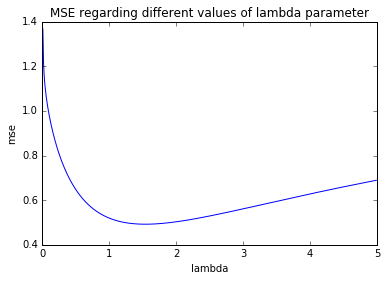

In [150]:

plt.plot(np.arange(0.01, 5, 0.01), mean_regression)
plt.xlabel('lambda')
plt.ylabel('mse')
plt.title('MSE regarding different values of lambda parameter')

In [151]:

result_CV= sorted(enumerate(mean_regression), key=lambda x: x[1])[0]
lambda_value= [np.arange(0.01, 5, 0.01)]
#print(ty
#pe(lambda_value))
#print(lambda_value[0][1])
print("the optimal value for lambda is " + str(lambda_value[0][1]))

print("the performance with optimal lambda is " + str(result_CV[1]))

the optimal value for lambda is 0.02
the performance with optimal lambda is 0.492237569653


The value of the MSE with the regularized linear regression is almost the same as the MSE obtained with the standard linear regression. The performance are almost the same between the 2 methods. 

# Q6: CLASSIFICATION

The limitation of using regression for this type of task is that we do not obtain integer, we have to round the predicted target and then obtain a bigger error , or transform the targets into continuous values, which won't fit with the original dataset. 
With classification we can be satisfied with discreete values and labels. 

The positive feature of KNN is that there is no training phase. The negative  one is that with K too big, small classes will tend to disappeare. 

I remarked that there was a lot of double lines in the dataset, which can skew the execution of the KNN algorithm. indeed, the alogirthm looks for the K nearest neighbors, if they are all the same , the result won't be as precise as expected.  

In [158]:
import math
def euclidieanDistance(point1, point2, length_point):
    distance=0
    for x in range(length_point):
        distance += pow((point1[x] - point2[x]), 2)
    return math.sqrt(distance)



In [159]:
euclidieanDistance(X_test[0], X_test[30], 11)

100.84228789760027

This function gets the neighbors of a point. 

In [160]:
import operator
def getNeighbors(trainingSet, tested_point, K):
    distances=[]
    length= len(tested_point)-1
    for x in range(len(trainingSet)):
        dist= euclidieanDistance(tested_point, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    #distances.sort(key=operator.itemgetter(1))
    sorted(distances, key=lambda x: x[1])
    neighbors=[]
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors


This function return the most common classes among the neighbors

In [161]:
from collections import Counter

def get_majority_vote(neighbors):
    classes = [neighbor[11] for neighbor in neighbors]
    count= Counter(classes)
    return count.most_common()[0][0]

In [162]:
def KNNfunction(TestSet, TrainingSet,K):
    predictions=[]
    
    for x in range(len(TestSet)):
        neighbors = getNeighbors(TrainingSet, TestSet[x], K)
        majority_vote= get_majority_vote(neighbors)
        predictions.append(majority_vote)
        #print("Predicted label = " + str(majority_vote))
        #print("Actual label = " + str(Test_Array[x][11]))
    score_list= []
    for x in range(len(TestSet)):
        if predictions[x]== TestSet[x][11]:
            score_list.append(1)
        else:
            score_list.append(0)
    performance= np.mean(score_list)
    knn_fct_return.append(performance)
    #print(str(performance*100)+ "%")

In [163]:
mean_knn=[]
for K in range(1,15,1):  
    knn_fct_return=[]
    for m in range(10):
        X_test=[]
        X_test= list_des_fold[m]
        X_training=[]
        #print(X_test[0])
        #print(red_wine_matrix[620])

        for n in range(10):
            if n!=m:
                for data in list_des_fold[n]:
                    X_training.append(data)

        KNNfunction(X_test, X_training, K)
        #print("round numero " + str(m) + "de la CV is done!")
    print("pour K= " + str(K)+ "le return est " + str(knn_fct_return))
    mean_de_knn_list= np.mean(knn_fct_return)
    print(mean_de_knn_list)

    mean_knn.append(mean_de_knn_list)

#print(mean_knn)
    



pour K= 1le return est [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012578616352201259]
0.00125786163522
pour K= 2le return est [0.0, 0.025157232704402517, 0.012578616352201259, 0.031446540880503145, 0.0440251572327044, 0.050314465408805034, 0.031446540880503145, 0.025157232704402517, 0.031446540880503145, 0.050314465408805034]
0.0301886792453
pour K= 3le return est [0.0, 0.037735849056603772, 0.012578616352201259, 0.031446540880503145, 0.031446540880503145, 0.031446540880503145, 0.018867924528301886, 0.031446540880503145, 0.0440251572327044, 0.025157232704402517]
0.0264150943396
pour K= 4le return est [0.0, 0.037735849056603772, 0.012578616352201259, 0.031446540880503145, 0.031446540880503145, 0.031446540880503145, 0.018867924528301886, 0.031446540880503145, 0.0440251572327044, 0.025157232704402517]
0.0264150943396
pour K= 5le return est [0.0, 0.037735849056603772, 0.012578616352201259, 0.031446540880503145, 0.031446540880503145, 0.031446540880503145, 0.018867924528301886, 0.031446

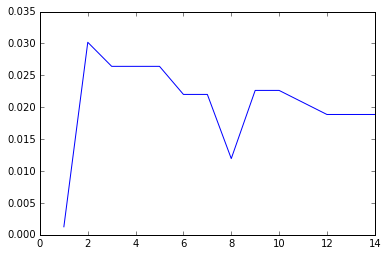

In [164]:
k_value= range(1, 15, 1)
plt.plot(k_value, mean_knn)

In [165]:
result_CV_knn= sorted(enumerate(mean_knn), key=lambda x: x[1])[0]

#print(ty
#pe(lambda_value))
#print(lambda_value[0][1])
#print("the optimal value for K is " + str(k_value[0][1]))

print("the performance with optimal K is " + str(result_CV_knn[1]*100))

the performance with optimal K is 0.125786163522


The result is false, there might be a problem in the execution of the cross validation. 

The performance seems to be more or less equals for each of the 3 methods, but the results seems to be more consistent for the classification methods, since we are using discreete targets.